In [2]:
import os

os.chdir("/home/tales/dev/master/mdc_analysis/")
print("working dir", os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt

import gc
from src.dao import csv_dao
from src.plot import plot
from src.utils import geo

from bokeh.io import output_notebook, show
output_notebook()

pd.set_option('display.float_format', lambda x: '%.4f' % x)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

working dir /home/tales/dev/master/mdc_analysis


Loading BokehJS ...

# Stop Region nearest POIs 

## Loading

In [2]:
# def valid_amenities(pois):
#     return pois[pois["amenity"].isna() == False]

def unique_stop_regions(knn_pois):
    unique_sr = knn_pois.drop_duplicates(subset=["lat_sr", "lon_sr"], keep="first")["sr_id"].tolist()
    return knn_pois[knn_pois["sr_id"].isin(unique_sr)]

def load_sr_knn_pois_for_all_users():
    users = csv_dao.list_stop_region_usernames()
    knn_pois = pd.DataFrame()
    
    for user in users:
        print("user_id: {}".format(user))
        try:
            user_knn_pois = csv_dao.load_sr_distance_to_close_pois(user)
            #print("User {} data loaded".format(user))
        except FileNotFoundError:
            continue
            
        user_knn_pois["user"] = user
        knn_pois = knn_pois.append(user_knn_pois)
    print("done!")
    return knn_pois

In [446]:
# import datetime
# import time

# def hour(human_time):
#     human_time = str(human_time)
#     print(human_time)
#     return int(human_time.split(":")[0]), int(human_time.split(":")[1]), float(human_time.split(":")[2])

# h = hour(datetime.datetime.now().time())[0]

# while (h < 9):
#     h = hour(datetime.datetime.now().time())[0]
#     time.sleep(600)

In [4]:
sr_knn_pois = load_sr_knn_pois_for_all_users()
print("All Stop Regions:    {}".format(len(sr_knn_pois["sr_id"].drop_duplicates())))
unique_sr_knn_pois = unique_stop_regions(sr_knn_pois)
print("Unique Stop Regions: {}".format(len(unique_sr_knn_pois["sr_id"].drop_duplicates())))

unique_sr_knn_pois.sample(6)

user_id: 6189
user_id: 5936
user_id: 6087
user_id: 5973
user_id: 6085
user_id: 6074
user_id: 6012
user_id: 5982
user_id: 5948
user_id: 5974
user_id: 6090
user_id: 6199
user_id: 6068
user_id: 6024
user_id: 5976
user_id: 6094
user_id: 5941
user_id: 5995
user_id: 5962
user_id: 6093
user_id: 6033
user_id: 6079
user_id: 6038
user_id: 6175
user_id: 6042
user_id: 5924
user_id: 6083
user_id: 6178
user_id: 5958
user_id: 6086
user_id: 6100
user_id: 5945
user_id: 5925
user_id: 5935
user_id: 6172
user_id: 5955
user_id: 6073
user_id: 5980
user_id: 6010
user_id: 5993
user_id: 6037
user_id: 5979
user_id: 5966
user_id: 5985
user_id: 5967
user_id: 5970
user_id: 6169
user_id: 6188
user_id: 6097
user_id: 6096
user_id: 6041
user_id: 6192
user_id: 6064
user_id: 6183
user_id: 5954
user_id: 5972
user_id: 6060
user_id: 6069
user_id: 5937
user_id: 6028
user_id: 5990
user_id: 6071
user_id: 5928
user_id: 5992
user_id: 6058
user_id: 6001
user_id: 5964
user_id: 5950
user_id: 5991
user_id: 6177
user_id: 5961
user_i

,distance,osm_id,lat_sr,lon_sr,sr_id,position,user
5,387.4354,2159012425,46.5450,6.5768,5959_698,5,5959
7,406.5274,1259926229,46.5394,6.6224,5993_1120,7,5993
2,13.8814,6268079534,46.9475,7.4415,6014_521,2,6014
22,218.5294,6383474325,46.5123,6.6594,6189_387,22,6189
10,1840.5518,1784677900,46.5947,7.0598,5965_437,10,5965
29,4269.4056,3691003419,46.1398,7.3333,6094_147,29,6094


In [3]:
#pois = csv_dao.load_hot_osm_pois()
valid_pois = csv_dao.load_hot_osm_pois(valid_pois=True)
print("{} valid pois".format(len(valid_pois)))
valid_pois.sample(6)

184105 valid pois


,osm_id,latitude,longitude,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,barrier,bicycle,brand,bridge,boundary,building,capital,construction,covered,culvert,cutting,denomination,disused,ele,embankment,foot,generator:source,harbour,highway,historic,horse,intermittent,junction,landuse,layer,leisure,lock,man_made,military,motorcar,name,natural,office,oneway,operator,place,poi,population,power,power_source,public_transport,railway,ref,route,service,shop,sport,surface,toll,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way,lon_4326,lat_4326,building_+_religion
123057,6202775542,825209.8300,6025425.9900,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,wayside_cross,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D008FC2F5A8F32E2941F6285C7F34FC...,7.4130,47.5082,NaN
291891,617245066,1020963.8400,6051869.3400,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,KoroNa,NaN,NaN,nan,"Fakultät EI, HTWG Konstanz",NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,attraction,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D00E17A14AE47282F415C8FC2550716...,9.1715,47.6684,NaN
30150,972163070,654662.7700,5933011.3000,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,memorial,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,Monument aux morts,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D00A4703D8A8DFA2341333333D3F4A1...,5.8809,46.9445,NaN
305725,4351219275,1129031.4000,5935876.3500,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,information,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D0066666666473A314166666616C1A4...,10.1423,46.9620,NaN
161353,2517630437,852975.1300,6042453.6100,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,Zohle Mio,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,clothes,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D00295C8F42DE072A41713D0A67D50C...,7.6624,47.6114,NaN
98399,5208206803,931070.3600,5953822.3200,NaN,NaN,NaN,NaN,nan,NaN,NaN,library,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,Bibliothek Adligenswil,NaN,NaN,nan,Gemeinde Adligenswil,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,nan,010100002031BF0D0085EB51B8FC692C4148E17A9447B6...,8.3640,47.0719,NaN


## Merging dataframes

In [6]:
unique_sr_knn_pois = unique_sr_knn_pois.merge(valid_pois, how="inner", on="osm_id")
unique_sr_knn_pois.sort_values(by=["sr_id", "position"]).head()

,distance,osm_id,lat_sr,lon_sr,sr_id,position,user,amenity,lat_4326,lon_4326
1087016,17.1129,5491545637,46.2920,7.5327,5924_100,0,5924,NaN,46.2922,7.5326
1086510,36.4194,1128531574,46.2920,7.5327,5924_100,1,5924,restaurant,46.2923,7.5325
1087269,37.3907,2428513079,46.2920,7.5327,5924_100,2,5924,NaN,46.2923,7.5330
1086386,54.6504,5491540912,46.2920,7.5327,5924_100,3,5924,post_office,46.2922,7.5320
1085587,61.8385,5491577211,46.2920,7.5327,5924_100,4,5924,NaN,46.2925,7.5323


## Removing Home and Work Stop Regions

In [7]:
# def remove_home_and_work_sr(data):
    
#     for user_id in users = csv_dao.list_stop_region_usernames():
#         home_sr_ids = csv_dao.load_home_inferred_sr_ids()
#         work_sr_ids = csv_dao.load_work_inferred_sr_ids()

#     return data[~data["sr_id"].isin(home_sr_ids + work_sr_ids)]

In [8]:
# print(len(unique_sr_knn_pois))
# unique_sr_knn_pois = remove_home_and_work_sr(unique_sr_knn_pois)
# print(len(unique_sr_knn_pois))

## How far to the Stop Regions are the POIs?

In [9]:
home_and_work = []
for user_id in unique_sr_knn_pois["user"].drop_duplicates().tolist():
    home_and_work = home_and_work + csv_dao.load_home_inferred_sr_ids(user_id) + csv_dao.load_work_inferred_sr_ids(user_id)

In [10]:
home_and_work_sr_knn_pois = unique_sr_knn_pois[unique_sr_knn_pois["sr_id"].isin(home_and_work)]
unique_sr_knn_pois = unique_sr_knn_pois[~unique_sr_knn_pois["sr_id"].isin(home_and_work)]
gc.collect()

154

In [11]:
print("HOME and WORK stop regions")
print(len(home_and_work_sr_knn_pois), "rows")
home_and_work_sr_knn_pois.sample(6)

HOME and WORK stop regions
424350 rows


,distance,osm_id,lat_sr,lon_sr,sr_id,position,user,amenity,lat_4326,lon_4326
41758,276.2441,4302050797,46.5132,6.6576,6109_959,13,6109,toilets,46.5109,6.6589
1056063,483.3747,2969053080,46.5450,6.5763,6057_35,21,6057,cafe,46.5414,6.5800
842944,1893.2557,1752595449,46.2763,6.9335,5928_358,13,5928,place_of_worship,46.2611,6.9446
1020787,214.6983,3094706337,46.5256,6.6116,6167_154,20,6167,place_of_worship,46.5275,6.6123
1062495,511.4572,5360433262,46.5448,6.5768,6057_299,21,6057,NaN,46.5450,6.5701
291241,372.3089,2389435268,46.5253,6.5658,5993_2267,27,5993,bank,46.5287,6.5664


In [12]:
print("Other stop regions")
print(len(unique_sr_knn_pois), "rows")
unique_sr_knn_pois.sample(6)

Other stop regions
1202131 rows


,distance,osm_id,lat_sr,lon_sr,sr_id,position,user,amenity,lat_4326,lon_4326
1010553,121.1893,5574658501,46.5151,6.6329,5953_1187,11,5953,cafe,46.5154,6.6313
448597,326.2484,4985478773,46.4523,6.8556,6188_266,28,6188,NaN,46.4537,6.8594
854260,1374.1899,5817406423,46.2763,6.9335,6001_835,11,6001,NaN,46.2793,6.9508
555274,15.8631,5458841112,46.4309,6.9090,5927_952,0,5927,NaN,46.4311,6.9090
1526658,365.7850,5870849750,46.7880,7.5353,5964_651,6,5964,restaurant,46.7869,7.5398
519335,128.4188,412733722,46.4600,6.8406,6182_5,10,6182,toilets,46.4605,6.8421


In [13]:
firsts = pd.DataFrame()
seconds = pd.DataFrame()
thirds = pd.DataFrame()
for sr_id in unique_sr_knn_pois["sr_id"].drop_duplicates():
    sr_knn = unique_sr_knn_pois[unique_sr_knn_pois["sr_id"] == sr_id]
    
    firsts = firsts.append(sr_knn[sr_knn["position"] == 0])
    seconds = seconds.append(sr_knn[sr_knn["position"] == 1])
    thirds = thirds.append(sr_knn[sr_knn["position"] == 2])    

In [14]:
firsts["distance"].describe()

count   40353.0000
mean      172.1868
std       268.4733
min         0.0000
25%        27.1938
50%        82.8866
75%       208.8497
max      6203.3849
Name: distance, dtype: float64

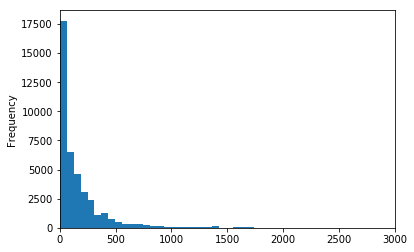

In [15]:
firsts["distance"].plot.hist(xlim=(0, 3000), bins=100)

In [16]:
seconds["distance"].describe()

count   40308.0000
mean      247.1294
std       359.3154
min         1.5226
25%        47.3730
50%       134.1074
75%       288.1164
max      8904.5200
Name: distance, dtype: float64

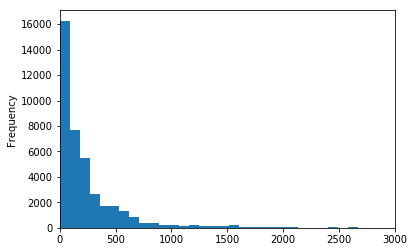

In [17]:
seconds["distance"].plot.hist(xlim=(0, 3000), bins=100)

In [18]:
thirds["distance"].describe()

count   40297.0000
mean      308.8850
std       427.2570
min         1.5226
25%        63.8929
50%       172.1177
75%       361.6748
max     10078.9291
Name: distance, dtype: float64

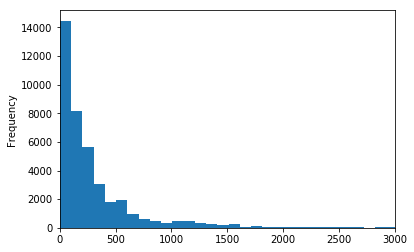

In [19]:
thirds["distance"].plot.hist(xlim=(0, 3000), bins=100)

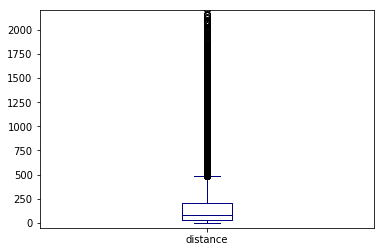

In [20]:
firsts["distance"].plot.box(ylim=(-50,2200), color="navy")

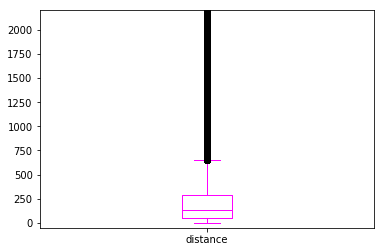

In [21]:
seconds["distance"].plot.box(ylim=(-50,2200), color="magenta")

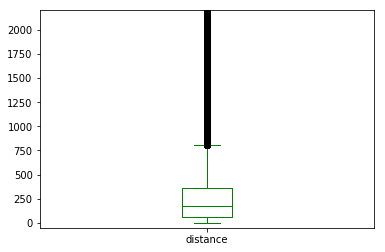

In [22]:
thirds["distance"].plot.box(ylim=(-50,2200), color="green")

## Closer POIs frequency of amenities

tipo lugar que o cara costuma frequentar... :)

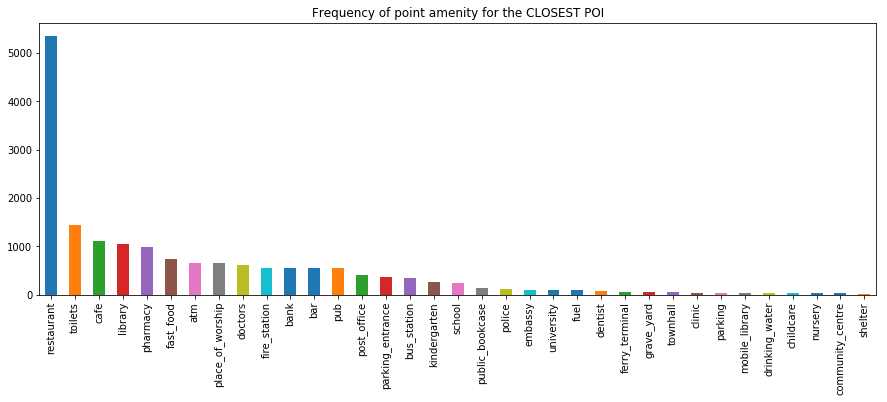

In [23]:
f, ax = plt.subplots(figsize=(15,5))
firsts["amenity"].value_counts().head(35).plot.bar(title="Frequency of point amenity for the CLOSEST POI")

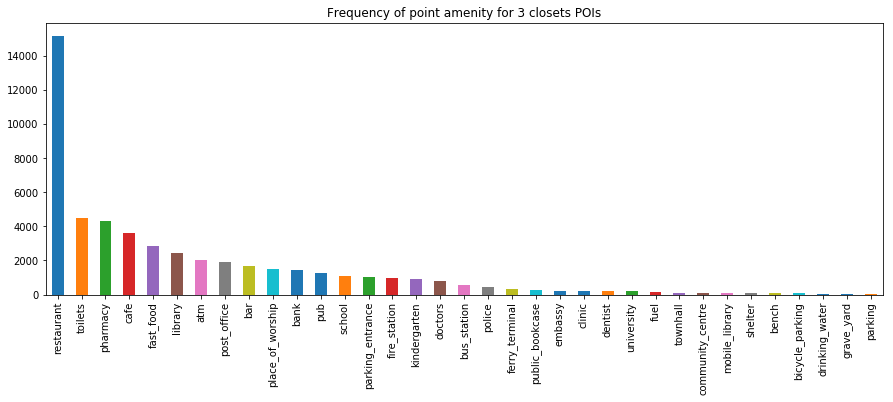

In [24]:
f, ax = plt.subplots(figsize=(15,5))
firsts.append(seconds).append(thirds)["amenity"].value_counts().head(35).plot.bar(title="Frequency of point amenity for 3 closets POIs")

## Plot Stop Regions and POIs

In [529]:
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import HoverTool 

def centroid_figure_mouseover(centroids, title="", lat_col="latitude", lon_col="longitude", 
                              width=800, height=600, legend=None, point_color="magenta", 
                              point_size=3, fill_color="magenta", cluster_alpha=0.3):

    locs = centroids.apply(lambda centroid : geo.gps_loc_to_web_mercator(lat=centroid[lat_col], lon=centroid[lon_col]), axis=1)
    centroids["lon_sr"] = locs.apply(lambda loc: loc[0])
    centroids["lat_sr"] = locs.apply(lambda loc: loc[1])
        
    sr_source = ColumnDataSource(data=dict(
        lon=centroids["lon_sr"].drop_duplicates().tolist(),
        lat=centroids["lat_sr"].drop_duplicates().tolist(),
        sr_id=centroids["sr_id"].drop_duplicates().tolist()
    ))
    
    TOOLTIPS = [
        ("sr_id", "@sr_id")
    ]
    
    fig = plot.mercator_fig("", width=width, height=height)

    fig.circle("lon", "lat", color=point_color, size=3,
                   source=sr_source, legend=legend)
    
    centroid_circle = fig.circle("lon", "lat", color=point_color, size=3,
                   source=sr_source)

    fig.add_tools(HoverTool(renderers=[centroid_circle], tooltips=TOOLTIPS))
    
    glyph = centroid_circle.glyph
    glyph.size = 20
    glyph.fill_alpha = cluster_alpha
    glyph.fill_color = fill_color
    glyph.line_alpha = cluster_alpha
    glyph.line_color = "firebrick"
    glyph.line_dash = [6, 3]
    glyph.line_width = 1
    
    return fig

In [557]:
from src.plot import plot
from bokeh.plotting import figure, ColumnDataSource

    
def plot_sr_knn_pois(sr_knn_pois_data, user_home, user_work, title="", width=800, height=600):
    pois_locs = sr_knn_pois_data.apply(lambda poi : geo.gps_loc_to_web_mercator(lat=poi["lat_4326"], lon=poi["lon_4326"]), axis=1)
    sr_knn_pois_data["lon_mercator"] = pois_locs.apply(lambda loc: loc[0])
    sr_knn_pois_data["lat_mercator"] = pois_locs.apply(lambda loc: loc[1])
    
    p = centroid_figure_mouseover(sr_knn_pois_data, title="Stop Regions and close POIs" , lat_col="lat_sr", lon_col="lon_sr", width=width, height=height, legend="stop_region")

    closest = sr_knn_pois_data[sr_knn_pois_data["position"] == 0]
    
    poi_data = sr_knn_pois_data[["osm_id", "position", "lat_mercator", "lon_mercator", "distance", "sr_id"]].drop_duplicates()
    
    poi_source = ColumnDataSource(data=dict(
        lon=poi_data["lon_mercator"].tolist(),
        lat=poi_data["lat_mercator"].tolist(),
        position=poi_data["position"].tolist(),
        distance=poi_data["distance"].tolist(),
        sr_id=poi_data["sr_id"].tolist(),
        osm_id=poi_data["osm_id"].tolist()
    ))
    
    closest_poi_source = ColumnDataSource(data=dict(
        lon=closest["lon_mercator"].tolist(),
        lat=closest["lat_mercator"].tolist(),
        position=closest["position"].tolist(),
        distance=closest["distance"].tolist(),
        sr_id=poi_data["sr_id"].tolist()
    ))
    
    TOOLTIPS = [
        ("position", "@position"),
        ("distance", "@distance"),
        ("sr_id", "@sr_id"),
        ("osm_id", "@osm_id")
    ]

    circle = p.circle(x="lon", y="lat", 
                      size=7, alpha=0.5, color="red", legend="poi", source=poi_source)

    closest_circle = p.circle(x="lon", y="lat", 
                              size=7, alpha=0.5, color="#005073", legend="closest poi", source=closest_poi_source)
    
    p.add_tools(HoverTool(renderers=[closest_circle], tooltips=TOOLTIPS))
    p.add_tools(HoverTool(renderers=[circle], tooltips=TOOLTIPS))
    
    plot.plot_stop_regions_centroids(user_home, legend="home", fill_color="green", lat_col="lat_sr", lon_col="lon_sr", p=p)
    plot.plot_stop_regions_centroids(user_work, legend="work", fill_color="orange", lat_col="lat_sr", lon_col="lon_sr", p=p)
    
    print(closest["distance"].median())
    return p

In [558]:
print(len(unique_sr_knn_pois[unique_sr_knn_pois["user"] == "6170"]))

14860


In [559]:
user_id = "6104"

user_data = unique_sr_knn_pois[(unique_sr_knn_pois["user"] == user_id) & (unique_sr_knn_pois["position"] <= 4)]
print("user data done!")
user_hw = home_and_work_sr_knn_pois[home_and_work_sr_knn_pois["user"] == user_id]

user_home = user_hw[user_hw["sr_id"].isin(csv_dao.load_home_inferred_sr_ids(user_id))].drop_duplicates(["lat_sr", "lon_sr"])
user_work = user_hw[user_hw["sr_id"].isin(csv_dao.load_work_inferred_sr_ids(user_id))].drop_duplicates(["lat_sr", "lon_sr"])
print("user_hw")


print(len(user_data), len(user_home), len(user_work))

p = plot_sr_knn_pois(user_data, user_home, user_work, title="user_id: {}".format(user_id), width=800, height=600)
show(p)

user data done!
user_hw
335 73 5
50.792571423115604


sr 6104_94

In [561]:
pois = csv_dao.load_hot_osm_pois()
pois["latitude"] = pois["lat_4326"]
pois["longitude"] = pois["lon_4326"]

slice_data = geo.slice_geo_data2(pois, 46.5457, 6.5681, search_tolerance=0.005)
print(len(slice_data))

51


In [562]:
for i, point in slice_data.iterrows():
    plot.plot_point(figure=p, lat=point["latitude"], lon=point["longitude"], color="black")
show(p)